In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import plotly.express as px
from datetime import datetime, timedelta
import json

%matplotlib inline
plt.style.use('seaborn-v0_8')

In [2]:
BASE_URL = "https://data-charts-api.hexlet.app"
START_DATE = "2023-03-01"
END_DATE = "2023-09-01"

Запрашиваем данные за период: 2023-03-01 - 2023-09-01


In [9]:
def fetch_visits_data(start_date, end_date):
    """
    Получение данных о посещениях из API
    """
    url = f"{BASE_URL}/visits"
    params = {
        'begin': start_date,
        'end': end_date
    }
    
    print(f"Запрос посещений: {url}?begin={start_date}&end={end_date}")
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Проверка на ошибки HTTP
        
        data = response.json()
        print(f"Получено записей о посещениях: {len(data)}")
        return data
        
    except requests.exceptions.RequestException as e:
        print(f"Ошибка при запросе данных о посещениях: {e}")
        return None

def fetch_registrations_data(start_date, end_date):
    """
    Получение данных о регистрациях из API
    """
    url = f"{BASE_URL}/registrations"
    params = {
        'begin': start_date,
        'end': end_date
    }
    
    print(f"Запрос регистраций: {url}?begin={start_date}&end={end_date}")
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Проверка на ошибки HTTP
        
        data = response.json()
        print(f"Получено записей о регистрациях: {len(data)}")
        return data
        
    except requests.exceptions.RequestException as e:
        print(f"Ошибка при запросе данных о регистрациях: {e}")
        return None

In [10]:
# Получение данных из API
print("=== ЗАГРУЗКА ДАННЫХ О ПОСЕЩЕНИЯХ ===")
visits_data = fetch_visits_data(START_DATE, END_DATE)

print("\n=== ЗАГРУЗКА ДАННЫХ О РЕГИСТРАЦИЯХ ===")
registrations_data = fetch_registrations_data(START_DATE, END_DATE)

# Проверка успешности загрузки
if visits_data is None or registrations_data is None:
    print("Ошибка: Не удалось загрузить данные из API")
else:
    print(f"\nУспешно загружено:")
    print(f"- Посещений: {len(visits_data)} записей")
    print(f"- Регистраций: {len(registrations_data)} записей")

=== ЗАГРУЗКА ДАННЫХ О ПОСЕЩЕНИЯХ ===
Запрос посещений: https://data-charts-api.hexlet.app/visits?begin=2023-03-01&end=2023-09-01
Получено записей о посещениях: 263459

=== ЗАГРУЗКА ДАННЫХ О РЕГИСТРАЦИЯХ ===
Запрос регистраций: https://data-charts-api.hexlet.app/registrations?begin=2023-03-01&end=2023-09-01
Получено записей о регистрациях: 21836

Успешно загружено:
- Посещений: 263459 записей
- Регистраций: 21836 записей


In [11]:
# Создание DataFrame из данных о посещениях
visits_df = None
registrations_df = None

if visits_data:
    visits_df = pd.DataFrame(visits_data)
    
    # Преобразование datetime в правильный формат
    visits_df['datetime'] = pd.to_datetime(visits_df['datetime'])
    
    # Переименование колонок для удобства
    visits_df = visits_df.rename(columns={
        'visit_id': 'uuid',
        'datetime': 'date'
    })
    
    print("=== ДАННЫЕ ПОСЕЩЕНИЙ ===")
    print(f"Размер: {visits_df.shape}")
    display(visits_df.head())
else:
    print("Нет данных о посещениях")

# Создание DataFrame из данных о регистрациях
if registrations_data:
    registrations_df = pd.DataFrame(registrations_data)
    
    # Преобразование datetime в правильный формат
    registrations_df['datetime'] = pd.to_datetime(registrations_df['datetime'])
    
    # Переименование колонок для удобства
    registrations_df = registrations_df.rename(columns={
        'datetime': 'date'
    })
    
    print("\n=== ДАННЫЕ РЕГИСТРАЦИЙ ===")
    print(f"Размер: {registrations_df.shape}")
    display(registrations_df.head())
else:
    print("Нет данных о регистрациях")

=== ДАННЫЕ ПОСЕЩЕНИЙ ===
Размер: (263459, 4)


,uuid,platform,user_agent,date
0,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01 10:36:22
1,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,2023-03-01 06:25:00
2,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01 10:26:13
3,19322fed-157c-49c6-b16e-2d5cabeb9592,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2023-03-01 12:33:06
4,04762a22-3c9f-40c9-9ac9-6628c4381836,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01 01:38:35



=== ДАННЫЕ РЕГИСТРАЦИЙ ===
Размер: (21836, 5)


,date,user_id,email,platform,registration_type
0,2023-03-01 07:40:13,2e0f6bb8-b029-4f45-a786-2b53990d37f1,ebyrd@example.org,web,google
1,2023-03-01 13:14:00,f007f97c-9d8b-48b5-af08-119bb8f6d9b6,knightgerald@example.org,web,email
2,2023-03-01 03:05:50,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15,cherylthompson@example.com,web,apple
3,2023-03-01 00:04:47,3e9914e1-5d73-4c23-b25d-b59a3aeb2b60,halldavid@example.org,web,email
4,2023-03-01 18:31:52,27f875fc-f8ce-4aeb-8722-0ecb283d0760,denise86@example.net,web,google


In [12]:
# Анализ данных посещений
if visits_df is not None:
    print("=== АНАЛИЗ ДАННЫХ ПОСЕЩЕНИЙ ===")
    print("Основная информация:")
    visits_df.info()
    
    print("\nСтатистическое описание:")
    display(visits_df.describe(include='all'))
    
    print("\nРаспределение по платформам:")
    platform_visits = visits_df['platform'].value_counts()
    print(platform_visits)
    
    print(f"\nВременной диапазон: {visits_df['date'].min()} - {visits_df['date'].max()}")
else:
    print("Нет данных о посещениях для анализа")

=== АНАЛИЗ ДАННЫХ ПОСЕЩЕНИЙ ===
Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263459 entries, 0 to 263458
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   uuid        263459 non-null  object        
 1   platform    263459 non-null  object        
 2   user_agent  263459 non-null  object        
 3   date        263459 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 8.0+ MB

Статистическое описание:


,uuid,platform,user_agent,date
count,263459,263459,263459,263459
unique,146085,4,32,NaN
top,2cee521c-1747-4457-9e07-b186d6fdee05,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,NaN
freq,4,236301,13623,NaN
mean,NaN,NaN,NaN,2023-06-01 06:22:22.042044672
min,NaN,NaN,NaN,2023-03-01 00:00:43
25%,NaN,NaN,NaN,2023-04-13 19:45:03
50%,NaN,NaN,NaN,2023-06-03 12:23:27
75%,NaN,NaN,NaN,2023-07-17 22:09:08
max,NaN,NaN,NaN,2023-08-31 23:52:57



Распределение по платформам:
platform
web        236301
android     13972
bot          7382
ios          5804
Name: count, dtype: int64

Временной диапазон: 2023-03-01 00:00:43 - 2023-08-31 23:52:57


In [13]:
# Анализ данных регистраций
if registrations_df is not None:
    print("\n" + "="*50)
    print("=== АНАЛИЗ ДАННЫХ РЕГИСТРАЦИЙ ===")
    print("Основная информация:")
    registrations_df.info()
    
    print("\nСтатистическое описание:")
    display(registrations_df.describe(include='all'))
    
    print("\nРаспределение по платформам:")
    platform_regs = registrations_df['platform'].value_counts()
    print(platform_regs)
    
    print("\nРаспределение по типам регистраций:")
    reg_types = registrations_df['registration_type'].value_counts()
    print(reg_types)
    
    print(f"\nВременной диапазон: {registrations_df['date'].min()} - {registrations_df['date'].max()}")
else:
    print("Нет данных о регистрациях для анализа")


=== АНАЛИЗ ДАННЫХ РЕГИСТРАЦИЙ ===
Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21836 entries, 0 to 21835
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               21836 non-null  datetime64[ns]
 1   user_id            21836 non-null  object        
 2   email              21836 non-null  object        
 3   platform           21836 non-null  object        
 4   registration_type  21836 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 853.1+ KB

Статистическое описание:


,date,user_id,email,platform,registration_type
count,21836,21836,21836,21836,21836
unique,NaN,21836,20868,3,4
top,NaN,2e0f6bb8-b029-4f45-a786-2b53990d37f1,ujones@example.com,android,email
freq,NaN,1,6,10582,8996
mean,2023-05-29 10:17:02.002747904,NaN,NaN,NaN,NaN
min,2023-03-01 00:04:47,NaN,NaN,NaN,NaN
25%,2023-04-12 01:49:47.500000,NaN,NaN,NaN,NaN
50%,2023-05-26 13:22:09,NaN,NaN,NaN,NaN
75%,2023-07-15 17:26:30.500000,NaN,NaN,NaN,NaN
max,2023-08-31 23:43:26,NaN,NaN,NaN,NaN



Распределение по платформам:
platform
android    10582
web         6877
ios         4377
Name: count, dtype: int64

Распределение по типам регистраций:
registration_type
email     8996
google    7105
apple     4006
yandex    1729
Name: count, dtype: int64

Временной диапазон: 2023-03-01 00:04:47 - 2023-08-31 23:43:26


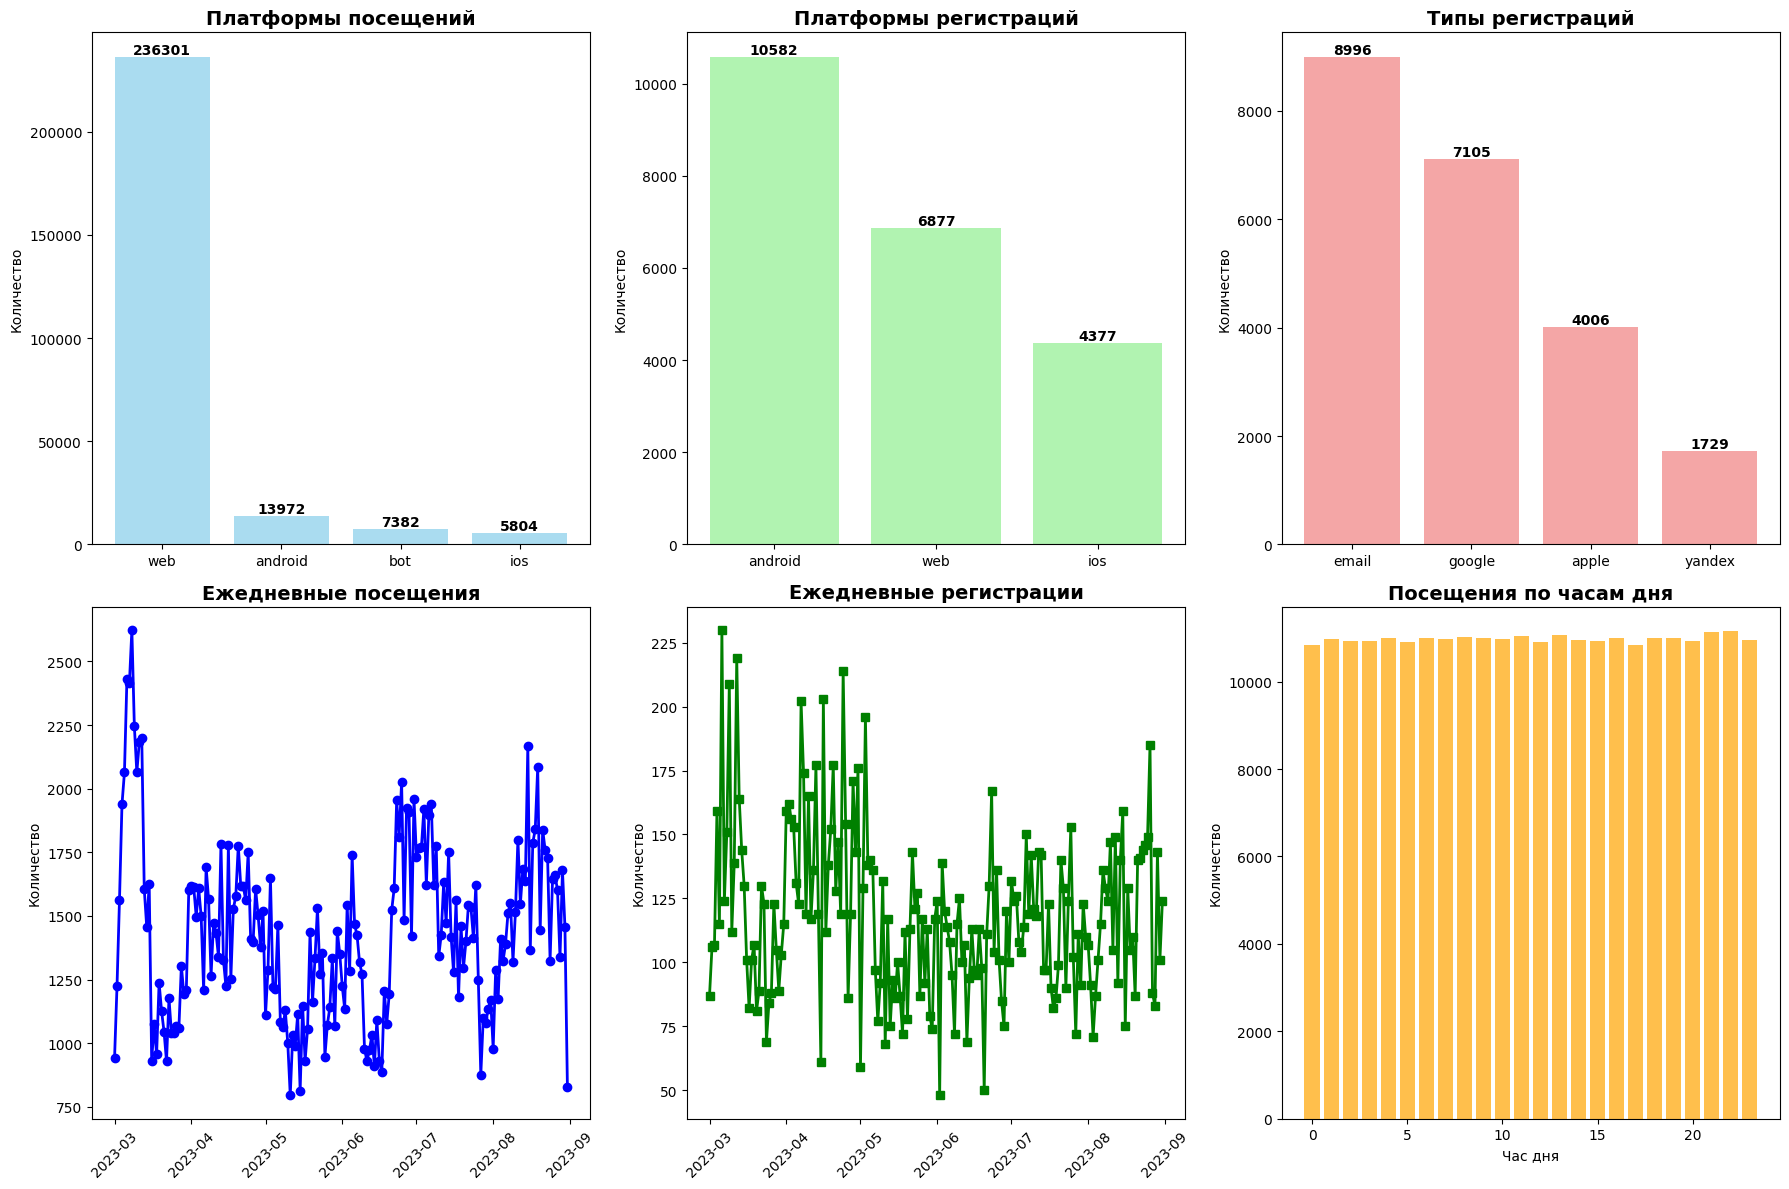

In [14]:
# Визуализация данных
if visits_df is not None and registrations_df is not None:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Распределение платформ для посещений
    platform_visits = visits_df['platform'].value_counts()
    axes[0, 0].bar(platform_visits.index, platform_visits.values, color='skyblue', alpha=0.7)
    axes[0, 0].set_title('Платформы посещений', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Количество')
    for i, v in enumerate(platform_visits.values):
        axes[0, 0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
    # 2. Распределение платформ для регистраций
    platform_regs = registrations_df['platform'].value_counts()
    axes[0, 1].bar(platform_regs.index, platform_regs.values, color='lightgreen', alpha=0.7)
    axes[0, 1].set_title('Платформы регистраций', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Количество')
    for i, v in enumerate(platform_regs.values):
        axes[0, 1].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
    # 3. Типы регистраций
    reg_types = registrations_df['registration_type'].value_counts()
    axes[0, 2].bar(reg_types.index, reg_types.values, color='lightcoral', alpha=0.7)
    axes[0, 2].set_title('Типы регистраций', fontsize=14, fontweight='bold')
    axes[0, 2].set_ylabel('Количество')
    for i, v in enumerate(reg_types.values):
        axes[0, 2].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
    # 4. Ежедневные посещения
    visits_df['date_only'] = visits_df['date'].dt.date
    daily_visits = visits_df['date_only'].value_counts().sort_index()
    axes[1, 0].plot(daily_visits.index, daily_visits.values, color='blue', linewidth=2, marker='o')
    axes[1, 0].set_title('Ежедневные посещения', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Количество')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 5. Ежедневные регистрации
    registrations_df['date_only'] = registrations_df['date'].dt.date
    daily_regs = registrations_df['date_only'].value_counts().sort_index()
    axes[1, 1].plot(daily_regs.index, daily_regs.values, color='green', linewidth=2, marker='s')
    axes[1, 1].set_title('Ежедневные регистрации', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Количество')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # 6. Распределение по часам (посещения)
    visits_df['hour'] = visits_df['date'].dt.hour
    hourly_visits = visits_df['hour'].value_counts().sort_index()
    axes[1, 2].bar(hourly_visits.index, hourly_visits.values, color='orange', alpha=0.7)
    axes[1, 2].set_title('Посещения по часам дня', fontsize=14, fontweight='bold')
    axes[1, 2].set_xlabel('Час дня')
    axes[1, 2].set_ylabel('Количество')
    
    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно данных для визуализации")

In [15]:
# Сохранение данных и создание сводки
if visits_df is not None:
    visits_df.to_csv(f'visits_api_{START_DATE}_to_{END_DATE}.csv', index=False)
    print(f"Данные о посещениях сохранены в: visits_api_{START_DATE}_to_{END_DATE}.csv")

if registrations_df is not None:
    registrations_df.to_csv(f'registrations_api_{START_DATE}_to_{END_DATE}.csv', index=False)
    print(f"Данные о регистрациях сохранены в: registrations_api_{START_DATE}_to_{END_DATE}.csv")

# Создание сводки анализа
if visits_df is not None and registrations_df is not None:
    summary = {
        'Метрика': [
            'Период анализа',
            'Всего посещений',
            'Уникальных посетителей',
            'Всего регистраций',
            'Уникальных пользователей',
            'Конверсия (регистрации/посещения)',
            'Самая популярная платформа посещений',
            'Самая популярная платформа регистраций',
            'Самый популярный тип регистрации'
        ],
        'Значение': [
            f"{START_DATE} - {END_DATE}",
            len(visits_df),
            visits_df['uuid'].nunique(),
            len(registrations_df),
            registrations_df['user_id'].nunique(),
            f"{(len(registrations_df) / len(visits_df) * 100):.2f}%",
            visits_df['platform'].value_counts().index[0],
            registrations_df['platform'].value_counts().index[0],
            registrations_df['registration_type'].value_counts().index[0]
        ]
    }
    
    summary_df = pd.DataFrame(summary)
    print("\n=== СВОДКА АНАЛИЗА ===")
    display(summary_df)
    
    # Сохранение сводки
    summary_df.to_csv('api_analysis_summary.csv', index=False)
    print("Сводка анализа сохранена в: api_analysis_summary.csv")

print("\n" + "="*60)
print("АНАЛИЗ ДАННЫХ ИЗ API ЗАВЕРШЕН!")
print("="*60)

Данные о посещениях сохранены в: visits_api_2023-03-01_to_2023-09-01.csv
Данные о регистрациях сохранены в: registrations_api_2023-03-01_to_2023-09-01.csv

=== СВОДКА АНАЛИЗА ===


,Метрика,Значение
0,Период анализа,2023-03-01 - 2023-09-01
1,Всего посещений,263459
2,Уникальных посетителей,146085
3,Всего регистраций,21836
4,Уникальных пользователей,21836
5,Конверсия (регистрации/посещения),8.29%
6,Самая популярная платформа посещений,web
7,Самая популярная платформа регистраций,android
8,Самый популярный тип регистрации,email


Сводка анализа сохранена в: api_analysis_summary.csv

АНАЛИЗ ДАННЫХ ИЗ API ЗАВЕРШЕН!
